In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import matplotlib.ticker as tk
from labellines import labelLines
import ipywidgets as ipy

In [1]:
def fanningFrictionFactor(frictionFactor:float,reynolds:float,nPrime:float)-> float:
    """
    Returns the fanning friction factor for non-newtonian fluids when combined with the scipy.optimize root function

    Args:
        frictionFactor (float): The fanning friction factor which will be solved for
        reynolds (float): The reynolds number for non-newtonian fluids
        nPrime (float): The power law exponent for non-newtonian fluid

    Returns:
        float: a float which represents the error in the fanning friction factor, will be equal to zero when the fanning friction factor has been found
    """
    
    return ((4.0/np.power(nPrime,0.75))*np.log10(reynolds*np.power(frictionFactor,1-(nPrime/2)))) - (0.4 / (np.power(nPrime,1.2))) - np.sqrt(1/frictionFactor)

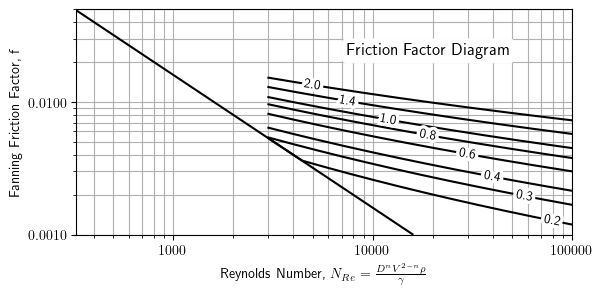

In [ ]:
#Create a new figure and axes
fig1, ax1 = plt.subplots()

#creates logarithmically spaced points in both the laminar and turbulent regimes
turbulentReynoldsRange = np.logspace(3.477,5,1000)
laminarReynoldsRange = np.logspace(2,4.2,1000)

#Creates a list of n-values which match those seen in the plot
nRange = [2.0, 1.4, 1.0, 0.8, 0.6, 0.4, 0.3, 0.2]

#For every n in the n-list
for j in range(len(nRange)):
    #Allocates space in memory for all of the solutions to the fanningFrictionFactor function
    solVec = np.zeros(np.size(turbulentReynoldsRange))
    
    #For every value of reynolds number in the turbulent regime
    for i in range(len(turbulentReynoldsRange)):
        #Find the value of fanning friction factor when the initial guess is 0.001, the reynolds number is the ith reynolds number in the turbulent regime and the jth reynolds number is the current value of n
        sol = root(fanningFrictionFactor,0.001,args=(turbulentReynoldsRange[i],nRange[j])).x
        #If the solution is lower than it would be in the laminar regime
        if sol < 16 / turbulentReynoldsRange[i]:
            #Set the value of the solution vector to the laminar friction factor
            solVec[i] = 16 / turbulentReynoldsRange[i]
        else:
            #Otherwise, implement the friction factor as usual
            solVec[i] = sol[0]
            
    #Create a log-log plot using the turbulent reynolds number vector and generated solutions at a given n
    ax1.loglog(turbulentReynoldsRange,solVec,color='k',label= str(nRange[j]))
    
#Plots the laminar regime of reynolds numbers
ax1.plot(laminarReynoldsRange,16/laminarReynoldsRange,color='k')

#Set x and y limits
plt.xlim((325,100000))
plt.ylim((.001,.05))

#set the aspect ratio
ax1.set_aspect(.666)

#Enable gridlines for major and minor ticks
ax1.grid(which='both',zorder=0)

#Change from scientific notation to scalar notation
ax1.xaxis.set_major_formatter(tk.ScalarFormatter())
ax1.yaxis.set_major_formatter(tk.ScalarFormatter())

#Enable LaTeX formatting
plt.rcParams['text.usetex'] = True

#Label the axes and title
ax1.set_xlabel(r'Reynolds Number, $N_{Re} = \frac{D^{n}V^{2-n}\rho}{\gamma}$')
ax1.set_ylabel(r'Fanning Friction Factor, f')
ax1.set_title("Friction Factor Diagram",x=.71,y=.76,zorder=3,bbox=dict(facecolor='white',edgecolor='none',boxstyle='round,pad=0.3'))

#Create inline labels for all n-values
labelLines(plt.gca().get_lines(),align=True,xvals=[5000,7500,12000,19000,30000,40000,58000,80000]);
